In [5]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=8,6
import seaborn as sb
sb.set()

In [23]:
data=pd.read_csv("nifty.csv")
data.head()
ma=18
data['returns']=np.exp(data["Close "]).diff()

data['ratio']=data['Close ']/data['ma']
data['ratio'].describe()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyError: 'ma'

In [26]:
ma=18
data['returns']=np.exp(data["Close "]).diff()
data['ma']=data['Close '].rolling(ma).mean()
data['ratio']=data['Close ']/data['ma']
data['ratio'].describe()



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    232.000000
mean       1.006960
std        0.014932
min        0.964281
25%        0.995375
50%        1.006671
75%        1.016132
max        1.049233
Name: ratio, dtype: float64

In [31]:
percentiles = [5, 10, 50, 90, 95]
p=np.percentile(data['ratio'].dropna(), percentiles)


ValueError: '__' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

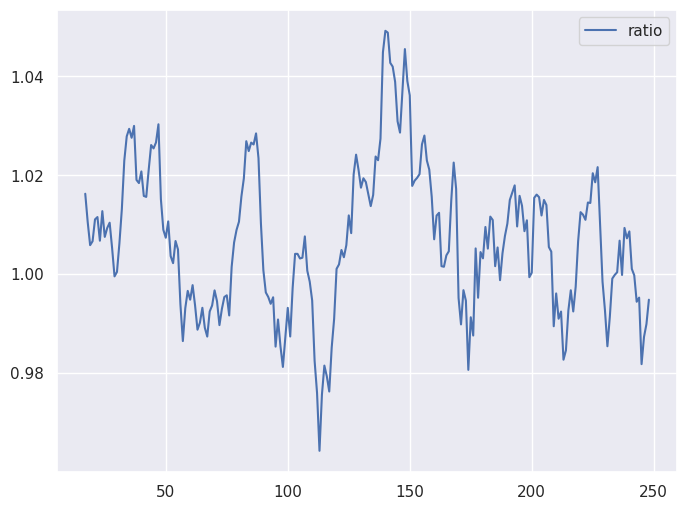

In [33]:
data['ratio'].dropna().plot(legend=True)
plt.axhline(p[0], c=(.5,.5,.5), ls='__')
plt.axhline(p[2], c=(.5,.5,.5), ls='__')
plt.axhline(p[-1], c=(.5,.5,.5), ls='__')